In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
df=pd.read_csv("spam.csv")
df.sample(5)

v1                                                 v2 Unnamed: 2  \
4098  ham                If u dun drive then how i go 2 sch.        NaN   
2754  ham  Ok Chinese food on its way. When I get fat you...        NaN   
4938  ham  Tomarrow i want to got to court. At  &lt;DECIM...        NaN   
3500  ham  says the  &lt;#&gt;  year old with a man and m...        NaN   
3105  ham  I had been hoping i would not have to send you...        NaN   

     Unnamed: 3 Unnamed: 4  
4098        NaN        NaN  
2754        NaN        NaN  
4938        NaN        NaN  
3500        NaN        NaN  
3105        NaN        NaN

In [93]:
df.shape

(5572, 5)

# 1. Data Clenaing:

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [95]:
#dropping columns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [96]:
df.sample(5)


v1                                                 v2
1712  ham  o turns out i had stereo love on mi phone unde...
655   ham      Tell them the drug dealer's getting impatient
1028  ham  Lol you forgot it eh ? Yes, I'll bring it in babe
25    ham  Just forced myself to eat a slice. I'm really ...
1891  ham  Probably earlier than that if the station's wh...

In [97]:
#renamimg the columns
df.rename(columns={'v1':'target','v2':'text'},inplace='True')
df.sample(5)

target                                               text
751    spam  You have an important customer service announc...
5093    ham                   Gokila is talking with you aha:)
682     ham                             Is xy going 4 e lunch?
5205   spam  Had your mobile 11mths ? Update for FREE to Or...
1109    ham                    S s..first time..dhoni rocks...

In [98]:
#target variable converting to numeric variable
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [99]:
df["target"]=encoder.fit_transform(df["target"])

In [100]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [101]:
#missing values:
df.isnull().sum()

target    0
text      0
dtype: int64

In [102]:
#check for duplicate values:
df.duplicated().sum()

403

In [103]:
#remove duplicated:
df=df.drop_duplicates(keep="first")

In [104]:
df.duplicated().sum()

0

In [105]:
df.shape

(5169, 2)

# 2.EDA:Exploritary data analysis

In [106]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [107]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

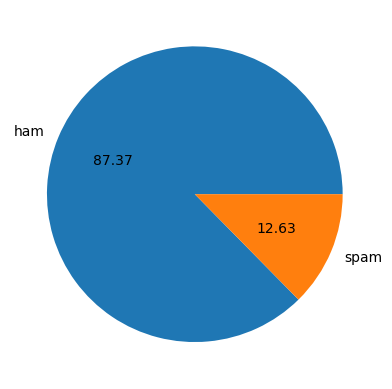

In [108]:
plt.pie(df['target'].value_counts(),labels=["ham",'spam'],autopct='%0.2f')
plt.show()

In [109]:
#data is imbalenced


In [110]:
import nltk

In [111]:
!pip install nltk

In [112]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishvajeet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [113]:
df['No_Of_Charecters']=df["text"].apply(len)

In [114]:
df.head()

target                                               text  No_Of_Charecters
0       0  Go until jurong point, crazy.. Available only ...               111
1       0                      Ok lar... Joking wif u oni...                29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...               155
3       0  U dun say so early hor... U c already then say...                49
4       0  Nah I don't think he goes to usf, he lives aro...                61

In [115]:
#calculating words in text msg
#list formed usig nltk 

df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [116]:
df['No_Of_Words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [117]:
df['No_Of_Words']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: No_Of_Words, Length: 5169, dtype: int64

In [118]:
df.head()

target                                               text  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

   No_Of_Charecters  No_Of_Words  
0               111           24  
1                29            8  
2               155           37  
3                49           13  
4                61           15

In [119]:
#no of setence in each text
df["No_Of_Sentence"]=df['text'].apply(lambda x:nltk.sent_tokenize(x))
df["No_Of_Sentence"].head()

0    [Go until jurong point, crazy.., Available onl...
1                     [Ok lar..., Joking wif u oni...]
2    [Free entry in 2 a wkly comp to win FA Cup fin...
3    [U dun say so early hor... U c already then sa...
4    [Nah I don't think he goes to usf, he lives ar...
Name: No_Of_Sentence, dtype: object

In [120]:
df["No_Of_Sentence"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df["No_Of_Sentence"]

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: No_Of_Sentence, Length: 5169, dtype: int64

In [121]:
df.head()

target                                               text  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

   No_Of_Charecters  No_Of_Words  No_Of_Sentence  
0               111           24               2  
1                29            8               2  
2               155           37               2  
3                49           13               1  
4                61           15               1

In [122]:
df[['No_Of_Charecters','No_Of_Words','No_Of_Sentence']].describe()

No_Of_Charecters  No_Of_Words  No_Of_Sentence
count       5169.000000  5169.000000     5169.000000
mean          78.977945    18.453279        1.947185
std           58.236293    13.324793        1.362406
min            2.000000     1.000000        1.000000
25%           36.000000     9.000000        1.000000
50%           60.000000    15.000000        1.000000
75%          117.000000    26.000000        2.000000
max          910.000000   220.000000       28.000000

In [123]:
# for ham:
df[df['target']==0][['No_Of_Charecters','No_Of_Words','No_Of_Sentence']].describe()

No_Of_Charecters  No_Of_Words  No_Of_Sentence
count       4516.000000  4516.000000     4516.000000
mean          70.459256    17.120903        1.799601
std           56.358207    13.493725        1.278465
min            2.000000     1.000000        1.000000
25%           34.000000     8.000000        1.000000
50%           52.000000    13.000000        1.000000
75%           90.000000    22.000000        2.000000
max          910.000000   220.000000       28.000000

In [124]:
df[df['target']==1][['No_Of_Charecters','No_Of_Words','No_Of_Sentence']].describe()

No_Of_Charecters  No_Of_Words  No_Of_Sentence
count        653.000000   653.000000      653.000000
mean         137.891271    27.667688        2.967841
std           30.137753     7.008418        1.483201
min           13.000000     2.000000        1.000000
25%          132.000000    25.000000        2.000000
50%          149.000000    29.000000        3.000000
75%          157.000000    32.000000        4.000000
max          224.000000    46.000000        8.000000

In [125]:
#visualizinng the and comparing the varibles
import seaborn as sns

<Axes: xlabel='No_Of_Charecters', ylabel='Count'>

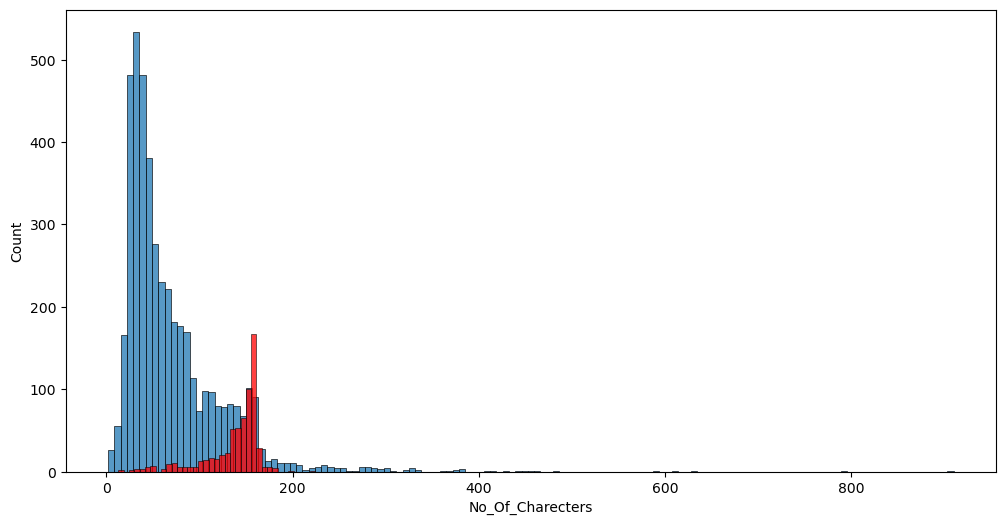

In [126]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['No_Of_Charecters'])
sns.histplot(df[df['target']==1]['No_Of_Charecters'],color='red')

In [127]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['No_Of_Words'])
sns.histplot(df[df['target']==1]['No_Of_Words'],color='red')


<Axes: xlabel='No_Of_Words', ylabel='Count'>

In [128]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target']==0]['No_Of_Sentence'])
sns.histplot(df[df['target']==1]['No_Of_Sentence'],color='red')

<Axes: xlabel='No_Of_Sentence', ylabel='Count'>

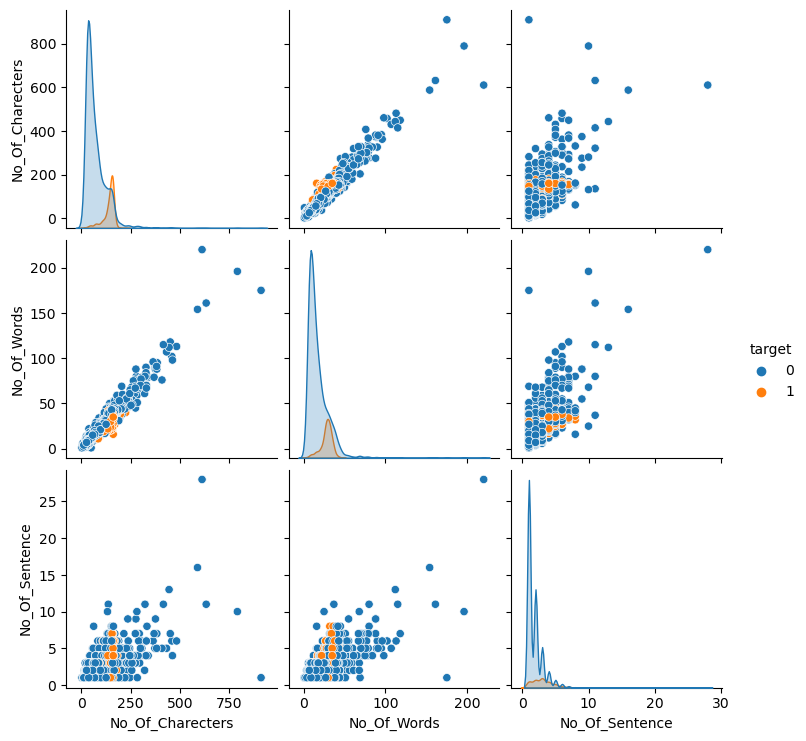

In [129]:
sns.pairplot(df,hue='target')

C:\Users\vishvajeet\AppData\Local\Temp\ipykernel_83436\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

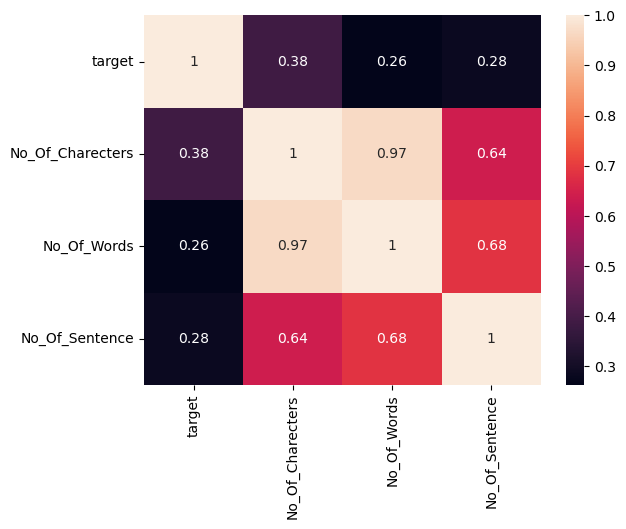

In [130]:
sns.heatmap(df.corr(),annot=True)

# 3.data preprocessing:

1.lower case
2.tokenisation
3.removing the special charaetcters
4.removing stop words and puncations
5.stemming

In [131]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishvajeet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [132]:
import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [133]:
def transform_text(text):
    # 1.lower case
    text=text.lower()
    text=nltk.word_tokenize(text)
    
   #tokenization 
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    #stopords and punctuations
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
     
    #steamming
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [134]:
transform_text('I Loved the Online Lectures On ML ,How About You')

'love onlin lectur ml'

In [135]:
text=df['text'][0]
transform_text(text)

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [136]:
text=df['text'][1]
transform_text(text)

'ok lar joke wif u oni'

In [137]:
#appling to the all the vlaues in text columns
df['transformed_text']=df['text'].apply(transform_text)


In [138]:
df.head()

target                                               text  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

   No_Of_Charecters  No_Of_Words  No_Of_Sentence  \
0               111           24               2   
1                29            8               2   
2               155           37               2   
3                49           13               1   
4                61           15               1   

                                    transformed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though

# creating wordcloud

it will highlight the main words in text message

In [139]:
!pip install wordcloud

In [140]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [141]:
# word cloud for spam messeges
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

In [142]:
plt.imshow(spam_wc)

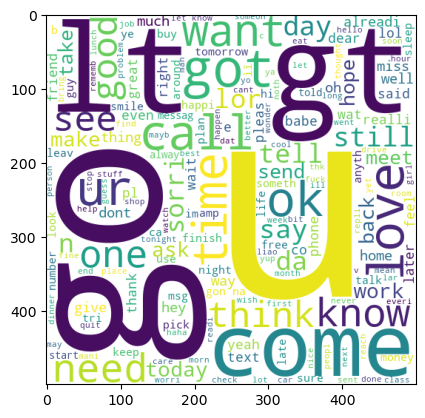

In [143]:
#creating wordcloud for the ham messages
ham_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

plt.imshow(ham_wc)

#creating list words that are lies in spams:

In [144]:
spam_corpus=[]
for msg in df[df['target']==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [145]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [146]:
#taking most 30 comman words in spam messages and creating datframe of them sequentially
from collections import Counter
mcs=pd.DataFrame(Counter(spam_corpus).most_common(30))
mcs #(most common spam word)

0    1
0      call  320
1      free  191
2         2  155
3       txt  141
4      text  122
5         u  119
6        ur  119
7     mobil  114
8      stop  104
9     repli  103
10    claim   98
11        4   97
12    prize   82
13      get   74
14      new   64
15   servic   64
16     tone   63
17     send   60
18   urgent   57
19    nokia   57
20  contact   56
21    award   55
22    phone   52
23     cash   51
24    pleas   51
25     week   49
26      win   48
27        c   45
28  collect   45
29      min   45

#plotting the graph 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

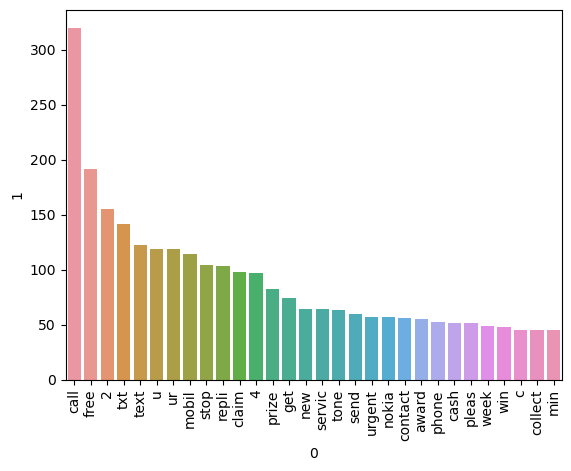

In [147]:
sns.barplot(x=mcs[0],y=mcs[1],data=mcs)
plt.xticks(rotation='vertical')

In [148]:
#similary for the ham messages:

ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
            for word in msg.split():
                ham_corpus.append(word)

In [149]:
len(ham_corpus)

35394

In [150]:
#creating data frame : #mah(most common ham):
mch=pd.DataFrame(Counter(ham_corpus).most_common(30))

In [151]:
sns.barplot(x=mch[0],y=mch[1],data=mch)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

# 4.Model Building:

In [152]:
#using CountVectorizer()

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [154]:
X= cv.fit_transform(df["transformed_text"]).toarray()

In [155]:
X.shape

(5169, 6708)

In [156]:
Y=df["target"].values

In [157]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [159]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [160]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [161]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [162]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [163]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [164]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# using tfidf

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [166]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [167]:
X.shape

(5169, 3000)

In [168]:
Y=df["target"].values

In [169]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [170]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [171]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [82]:
# --------> mnb giving high precion(1) using tfidf 

In [185]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred2)

# Plot confusion matrix
plt.pcolor(cm, cmap='Blues')
plt.colorbar()
plt.show()

In [83]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [84]:
# importing different classifieing models

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [85]:
svc = SVC (kernel='sigmoid', gamma=1.0)

knc = KNeighborsClassifier()

mnb=MultinomialNB() 

dtc= DecisionTreeClassifier(max_depth=5)

lrc= LogisticRegression(solver='liblinear', penalty='l1')

rfc=RandomForestClassifier(n_estimators=50, random_state=2)

abc=AdaBoostClassifier(n_estimators=50, random_state=2)
                         
bc= BaggingClassifier(n_estimators=50, random_state=2)

etc = ExtraTreesClassifier(n_estimators=58, random_state=2)

gbdt= GradientBoostingClassifier(n_estimators=50, random_state=2)

In [86]:
clfs={
    'SVC':svc,
    "knc":knc,
    "MNB":mnb,
    "DTC":dtc,
    "LRC":lrc,
    "RFC":rfc,
    "ADB":abc,
    "bc":bc,
    "etc":etc,
    "gbdt":gbdt
}

In [87]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision
    

In [88]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [89]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items(): 
    current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print(f"for {name} \n Accuracy:{current_accuracy}\n Precision:{current_precision}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for SVC 
 Accuracy:0.9758220502901354
 Precision:0.9747899159663865
for knc 
 Accuracy:0.9052224371373307
 Precision:1.0
for MNB 
 Accuracy:0.9709864603481625
 Precision:1.0
for DTC 
 Accuracy:0.9323017408123792
 Precision:0.8333333333333334
for LRC 
 Accuracy:0.9584139264990329
 Precision:0.9702970297029703
for RFC 
 Accuracy:0.9748549323017408
 Precision:0.9827586206896551
for ADB 
 Accuracy:0.960348162475822
 Precision:0.9292035398230089


KeyboardInterrupt: 

In [ ]:
#performance_df=pd.DataFrame({'algorithm':clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
#performance_df

In [ ]:
# ------------> model improvement

In [ ]:
#temp_df=pd.DataFrame({"algorithm":clfs.keys(),"Accuracy_maxft_3000":accuracy_scores,"Precision_maxft_3000":precision_scores}).sort_values('Precision_maxft_3000',ascending=False)

In [ ]:
#performance_df.merge(temp_df,on="algorithm")

In [ ]:
''' votinng classifier:
svc=SVC(kernel='sigmoid',gamma=0.1,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50 ,random_state=2)

from sklearn.ensemble import VotingClassifier'''

In [ ]:
#voting=VotingClassifier(estimators=[ ("svm",svc), ("nb",mnb), ("et",etc) ], voting='soft')

In [ ]:
#voting.fit_transform(x_train,y_train)

In [ ]:
#y_pred=voting.predict(x_test)
print(f"Accuracy : {accuracy_score(y_test,y_pred)},\n precision :{precision_score(y_test,y_pred)}")

In [ ]:
'''# applying stacking
estimators=[ ("svm",svc), ("nb",mnb), ("et",etc) ]
final_estimator=RandomForestClassifier()'''s

In [ ]:
#from sklearn.ensemble import StackingClassifier

In [ ]:
#clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [ ]:
'''clf.fit_transform(x_train,y_train)
y_pred=clf.predict(x_test)
print(f"Accuracy : {accuracy_score(y_test,y_pred)},\n precision :{precision_score(y_test,y_pred)}")'''

In [ ]:
#as we see only naviebayes can able to give high perforrmance rather than the combine voting and stacking so we move ahead with nb model

In [ ]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl",'wb'))
pickle.dump(mnb,open("model.pkl","wb"))